In [1]:
# File to use to test the main function, utility functions, and structure. Later will move changes to functions to separate files in utils folder.

In [1]:
#imports
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# import functions
from utils.AlpacaFunctions import get_historical_dataframe
from utils.data_process import return_rolling_averages

In [3]:
# set ticker, start date, end date, timeframe
ticker = "TSLA"

today = pd.Timestamp.now(tz="America/New_York")

start_date = pd.Timestamp(today - pd.Timedelta(days=500)).isoformat()

end_date = today

timeframe = '1D'

In [4]:
df = pd.DataFrame(get_historical_dataframe(ticker, start_date, end_date, timeframe)[ticker])

In [5]:
volume_df = pd.DataFrame(df["volume"])

In [6]:
volume_df

,volume
time,
2020-08-31 00:00:00-04:00,111197923
2020-09-01 00:00:00-04:00,81257715
2020-09-02 00:00:00-04:00,92367647
2020-09-03 00:00:00-04:00,80478522
2020-09-04 00:00:00-04:00,101060529
...,...
2022-01-05 00:00:00-05:00,24879847
2022-01-06 00:00:00-05:00,28202393
2022-01-07 00:00:00-05:00,26528721


In [14]:
close_df = pd.DataFrame(df["close"])

In [15]:
close_df

,close
time,
2020-08-31 00:00:00-04:00,498.5100
2020-09-01 00:00:00-04:00,475.0400
2020-09-02 00:00:00-04:00,447.2450
2020-09-03 00:00:00-04:00,407.0000
2020-09-04 00:00:00-04:00,417.9307
...,...
2022-01-05 00:00:00-05:00,1087.6201
2022-01-06 00:00:00-05:00,1064.7000
2022-01-07 00:00:00-05:00,1026.9000


In [16]:
averages = return_rolling_averages(close_df)

In [17]:
averages

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-08-31 00:00:00-04:00,498.5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01 00:00:00-04:00,475.0400,486.77500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02 00:00:00-04:00,447.2450,461.14250,473.598333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03 00:00:00-04:00,407.0000,427.12250,443.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04 00:00:00-04:00,417.9307,412.46535,424.058567,449.14514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 00:00:00-05:00,1087.6201,1118.62505,1145.633367,1112.89402,1104.087513,1090.87901,1052.188469,1029.637005,1030.688576,1056.294415,1072.535374,1057.903249,948.232822,920.569806,842.906542,789.248784
2022-01-06 00:00:00-05:00,1064.7000,1076.16005,1100.650033,1111.76802,1100.447512,1096.48601,1062.461546,1029.467005,1031.306671,1055.567944,1073.468174,1061.549431,951.928778,924.355306,846.010778,791.421684
2022-01-07 00:00:00-05:00,1026.9000,1045.80000,1059.740033,1105.70002,1092.703763,1092.43001,1072.215392,1030.641005,1029.344767,1053.524709,1073.246174,1064.478704,955.218890,927.965706,848.980917,793.355734


In [18]:
columns = close_df.columns
for col in range(len(close_df.columns)):
    print(columns[col])

close
2
3
5
8
10
13
20
21
34
50
55
89
100
144
200


<AxesSubplot:xlabel='time'>

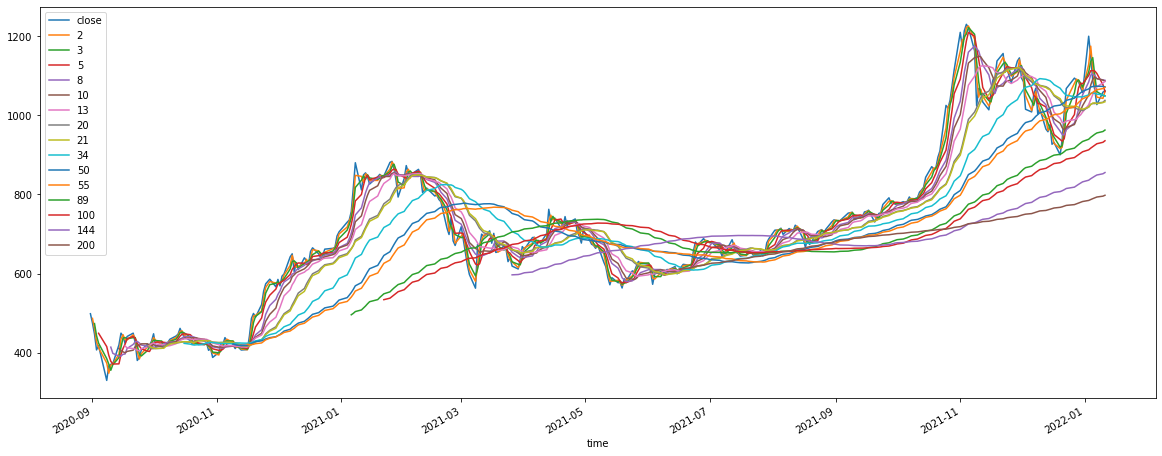

In [19]:
close_df.plot(figsize=[20,8])

In [16]:
# # pseudocode outline:

# function to get price history - args are stock ticker/s, amount of days
# 	call alpaca
# 	return dataframe

# function to get twitter history
# 	possibly filter for repeated tweets
# 	return signal

# function to get news history
# 	return signal

# function to get reddit history
# 	return signal

# function to get general sentiment signals history
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals


# function to get sentiment signals history of specific stock - arg is stock ticker
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals

# function to run machine learning - arg is combined signals and stock history
# 	add additional columns for each signal for a daily percent change and a 5 day moving average a 100 day moving average
# 	scale
# 	train/test split
# 	try a few machine learning possibilities, svm, adaboost, possibly neural - try to guess if it will go up or down the following day

# 	try the following : reduce overfitting with early stopping
	
# 	neural - y is determined by whether it goes up or down the following day. two output neurons, highest one is selected to make signal.
# 	check amount correct, amount incorrect, and difference between actual and strategy.	

# 	neural 2nd stage - train only on the indexes which were incorrectly predicted.

	




# 	return buy/sell signal


# Main function:
# 	determine which stocks to pull, one or many

# 	call function to get price history

# 	call function to get general sentiment signals history

# 	call function to get sentiment signals history for specific stock/s

# 	call function to run machine learning on the price history and signals

# 	output graphs





# terms to use in signal search for general:
# green
# renewable
# environment
# climate
# global warming
# climate crisis
# natural disaster
